# **Project: Classification of Malarial Cells using Convolutional Networks:**

### **1. Objective:**
The objective of this project, we develop a Convolutional Network Model (CNN) to classify malarial cells into:

* Parasitized/infected cell (1)
* Uninfected/healthy cell (0)

We shall demonstrate the end-to-end process, step by step.

### **2. Input Data:**

We make use of the open source Malaria Datasets made available by the National Institute of Medicine: https://lhncbc.nlm.nih.gov/LHC-publications/pubs/MalariaDatasets.html

* The data set consists of:
  * 13,779 image patches of parasitized/infected cell
  * 13,779 image patches of uninfected/healthy cells.


The labelled data is split this dataset into:
Training data subset (80%)
Testing data subsets (20%)

### **3. Approach:**

We shall implement the standard machine learning approach with the following steps:

1. Load the input data
2. Inspect and visualize the input data
3. Pre-process the input data
4. Build the CNN model
5. Train the CNN model
6. Evaluate the trained CNN model
7. Save the trained CNN model.

### **4. Performance Metrics:**

*   Training and validation loss as a function of the number of iterations
*   Training and validation accuracy as a function of the number of iterations.





### Author: Mohsen Ghazel (mghazel)
* Date: May 12th, 2021

##**Step 1: Python imports and global variables**



### **1.1) Imports:**

In [26]:
# numpy
import numpy as np
# matplot lib
import matplotlib.pyplot as plt
# opencv
import cv2
# PIL library
from PIL import Image
# keras
import keras

# sklearn imports
# - nededed for splitting the dataset into training and testing subsets
from sklearn.model_selection import train_test_split
# - nededed for 1-hot coding of the image labels
from keras.utils import to_categorical

# random number generators values
# seed for reproducing the random number generation
from random import seed
# random integers: I(0,M)
from random import randint
# random standard unform: U(0,1)
from random import random
# time
import datetime
# I/O
import os
# sys
import sys

# check for successful package imports and versions
# python
print("Python version : {0} ".format(sys.version))
# OpenCV
print("OpenCV version : {0} ".format(cv2.__version__))
# numpy
print("Numpy version  : {0}".format(np.__version__))

Python version : 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0] 
OpenCV version : 4.1.2 
Numpy version  : 1.19.5


In [11]:
# mount my Google drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **1.2) Global variables:**

In [74]:
#-------------------------------------------------------------------------------
# Set the random state to 101
#-------------------------------------------------------------------------------
# - This ensures repeatable results everytime you run the code. 
RANDOM_STATE = 101

#-------------------------------------------------------------------------------
# We set the Numpy pseudo-random generator at a fixed value:
#-------------------------------------------------------------------------------
# - This ensures repeatable results everytime you run the code. 
np.random.seed(RANDOM_STATE)

#-------------------------------------------------------------------------------
# Set the data directory where malaria data set is stored
#-------------------------------------------------------------------------------
image_directory = '/content/drive/MyDrive/Interviews-Preparation/SmileDirectClub/Malaria-cell-classification-CNN/data/cell_images/'

#-------------------------------------------------------------------------------
# set the input images size
#-------------------------------------------------------------------------------
INPUT_IMAGE_SIZE = 64

#-------------------------------------------------------------------------------
# We use the Malaria dataset from the National Librray of Medicine:
#-------------------------------------------------------------------------------
# - Source: https://lhncbc.nlm.nih.gov/LHC-publications/pubs/MalariaDatasets.html
# - It has 13,779 images of parasitized images
# - It has 13,779 images of uninfected images
# - For quick prototyping, we may want to only use a subset of this dataset
#-------------------------------------------------------------------------------
# the number of used images from the parasitized and uninfected available data 
# sets
#-------------------------------------------------------------------------------
NUM_USED_DATASET_IMAGES = 5000

#-------------------------------------------------------------------------------
# The available labelled dataset is spit into subsets:
#-------------------------------------------------------------------------------
# - Testing data subset
# - Training data subset
#-------------------------------------------------------------------------------
# This parameter indicates the proportion of randomly selected test data 
# subset from the the full data set
#-------------------------------------------------------------------------------
# 20 % of data is used for testing
# 80 % of data is used for training
#-------------------------------------------------------------------------------
TEST_DATA_SUBSET_PROPORTION = 0.20 

#-------------------------------------------------------------------------------
# The numbe rof visualized images
#-------------------------------------------------------------------------------
NUM_VISUALZIED_IMAGES = 25

##**Step 2: Implement utilities functions to execute the proposed approach:**
* The proposed standard machine learning approach has the following steps:
1. Load the input data
2. Inspect and visualize the input data
3. Split the input data set into training and test subsets
4. Build the CNN model
5. Train the CNN model
6. Evaluate the trained CNN model
7. Save the trained CNN model.
* We shall implement functions to execute each of these steps.


###**2.1: Implement a function to read the input data:**

In [56]:
#-------------------------------------------------------------------------------
# A function to read and format the input images and their labels
#-------------------------------------------------------------------------------
def read_input_data(data_folder, data_label):
   """
    Reads, resizes and stores the input data

    Parameters:
    -----------
    data_folder : str
        The data subfolder
    data_label : int
        Data label (1: infected. 0: uninfected)

    Returns
    -------
    num_images : int
        the number of read images
    data_images : list
        a list of read and formatted images
    data_labels : list
        a list of image labels (1: infected. 0: uninfected)
   """
   #-------------------------------------------------------------------------------
   # Create data structures to store the read input data including:
   # - The read and formatted input images 
   # - Their classification labels.
   #-------------------------------------------------------------------------------
   # Create containers to store the read images and their labels
   #-------------------------------------------------------------------------------
   # - create a list to store the images 
   #-------------------------------------------------------------------------------
   data_images = [] 
   #-------------------------------------------------------------------------------
   # - create a list to store the labels, we use:
   #-------------------------------------------------------------------------------
   #   - 0: for infected images
   #   - 1: for uninfected images.
   #-------------------------------------------------------------------------------
   data_labels = []  
   #-------------------------------------------------------------------------------

   # get the images in the data sub-folder
   image_list = os.listdir(image_directory + data_folder + '/')
   # initialize the number of images
   num_images = 0
   # itererate over the content of the sub-folder
   for i, image_name in enumerate(image_list):   
      # check if the file extension is: png t o indicate this is an image file
      if (image_name.split('.')[1] == 'png'):
         # increment the number of read images   
         num_images += 1;
         # check if we have selected the NUM_USED_DATASET_IMAGES images
         if ( num_images > NUM_USED_DATASET_IMAGES):
            # break
            break;

         # read the image
         image = cv2.imread(image_directory + data_folder + '/' + image_name)
         # format the image to type Image
         image = Image.fromarray(image, 'RGB')
         # resize the image
         image = image.resize((INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE))
         # convert it back to numpy array and append to to dataset list
         data_images.append(np.array(image))
         # append the label
         data_labels.append(data_label)

   # return data_images and data_labels
   return (data_images, data_labels)

###**2.2: Implement functions inspect and visualize the input data:**
####**2.2.1) Visualize sample images and their labels:**

In [57]:
# A utility function to visualize sample images:
def visualize_images_and_labels(data_images, data_labels):
   """
      To visualize sample images.

      Parameters:
      -----------
      data_images : list
        the list of images
      data_labels : list
        the list of labels

      Return:
      -------
         - None
   """
   # specify the overall grid size
   plt.figure(figsize=(15,15)) 
   # iterate over the 25 images
   for axis in range(NUM_VISUALZIED_IMAGES ):
       # create the subplot for the next ime
       plt.subplot(NUM_VISUALZIED_IMAGES  // 5, NUM_VISUALZIED_IMAGES  // 5, axis + 1)   
       # image counter 
       image_counter = randint(0, len(data_labels)-1)
       # the image label
       image_label = state = "Infected cell" if data_labels[image_counter] else "Healthy cell"
       # display the image
       plt.imshow(data_images[image_counter])
       plt.title("Image # " + str(image_counter) + ": " + image_label, fontsize = 12)
       plt.axis('off')

####**2.2.2) Check for class imbalance:**
* Visualie the histogram of infected and uninfected examples in the training and test subsets:

In [72]:
# create a histogram of the number of images in each class:
def create_class_examples_histogram(y, loc='left', relative=True):
   """
      To create a histogram of the number of images in each class.

      Parameters:
      -----------
      y : list
        the data labels

      Return:
      -------
         - None
   """
   width = 0.35
   if loc == 'left':
      n = -0.5
   elif loc == 'right':
      n = 0.5
     
   # calculate counts per type and sort, to ensure their order
   unique, counts = np.unique(y, return_counts=True)
   sorted_index = np.argsort(unique)
   unique = unique[sorted_index]
     
   if relative:
      # plot as a percentage
       counts = 100*counts[sorted_index]/len(y)
       ylabel_text = '% count'
   else:
      # plot counts
      counts = counts[sorted_index]
      ylabel_text = 'count'
         
   xtemp = np.arange(len(unique))
   plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
   plt.xticks(xtemp, unique, rotation=45)
   plt.xlabel('Class')
   plt.ylabel(ylabel_text)
   # return
   return


##**Step 3: The driver program:**
###**3.1) Read and visualize the infected data set:**

In [75]:
#-------------------------------------------------------------------------------
# Read the input infected cells data:
#-------------------------------------------------------------------------------
# infected cells data folder
infected_data_folder = 'Parasitized'
# infected cells data label
infected_data_label = 1
# read the infected data 
(infected_data_images, infected_data_labels) = read_input_data(infected_data_folder, infected_data_label)
#-------------------------------------------------------------------------------
# Visualize sample input infected cells data:
#-------------------------------------------------------------------------------
visualize_images_and_labels(infected_data_images, infected_data_labels)

KeyboardInterrupt: ignored

###**3.2) Read and visualize the uninfected data set:**

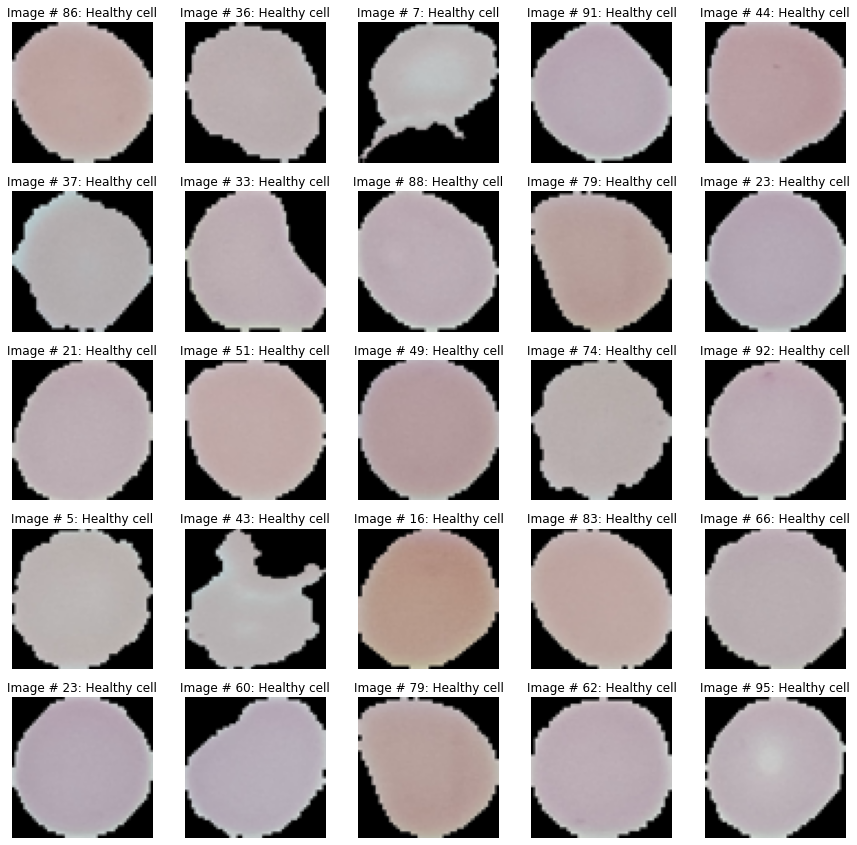

In [60]:
#-------------------------------------------------------------------------------
# Read the input uninfected cells data:
#-------------------------------------------------------------------------------
# uninfected cells data folder
uninfected_data_folder = 'Uninfected'
# infected cells data label
uninfected_data_label = 0
# read the infected data 
(uninfected_data_images, uninfected_data_labels) = read_input_data(uninfected_data_folder, uninfected_data_label)

#-------------------------------------------------------------------------------
# Visualize sample input uninfected cells data:
#-------------------------------------------------------------------------------
visualize_images_and_labels(uninfected_data_images, uninfected_data_labels)

###**3.3) Merge the infected and uninfected data sets together:**

In [64]:
#-------------------------------------------------------------------------------
# Concatenate the infected and unifected data subsets together
#-------------------------------------------------------------------------------
# concatenate the images data
infected_data_images.extend(uninfected_data_images)
data_images = infected_data_images
# concatenate the labels data
infected_data_labels.extend(uninfected_data_labels)
data_labels = infected_data_labels
print("-------------------------------------------------------------------------")
print("The dataset is split into training and testing subsets:")
print("-------------------------------------------------------------------------")
print("The number of training images = " + str(len(data_images)))
print("The number of test images = " + str(len(data_labels)))
print("-------------------------------------------------------------------------")

-------------------------------------------------------------------------
The dataset is split into training and testing subsets:
-------------------------------------------------------------------------
The number of training images = 200
The number of test images = 200
-------------------------------------------------------------------------


###**3.4) Split the data set into training and test data subsets:**

In [65]:
#-------------------------------------------------------------------------------
# Split the data set into training and test data subsets
#-------------------------------------------------------------------------------
# - Testing data subset: TEST_DATA_SUBSET_PROPORTION
# - Training data subset: (1-TEST_DATA_SUBSET_PROPORTION).
X_train, X_test, y_train, y_test = train_test_split(data_images, to_categorical(np.array(data_labels)), 
                                                    test_size = TEST_DATA_SUBSET_PROPORTION, 
                                                    shuffle=True,
                                                    random_state = RANDOM_STATE)
# display message
print("-------------------------------------------------------------------------")
print("The dataset is split into training and testing subsets:")
print("-------------------------------------------------------------------------")
print("The number of training images = " + str(len(y_train)))
print("The number of test images = " + str(len(y_test)))
print("-------------------------------------------------------------------------")

-------------------------------------------------------------------------
The dataset is split into training and testing subsets:
-------------------------------------------------------------------------
The number of training images = 160
The number of test images = 40
-------------------------------------------------------------------------


###**3.4) Check for class imbalance:**


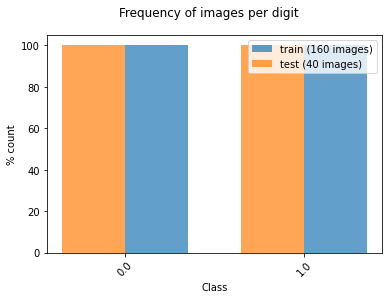

In [73]:
#-------------------------------------------------------------------------------
# Check for class imbalance
#-------------------------------------------------------------------------------
plt.suptitle('Frequency of images per digit')
create_class_examples_histogram(y_train, loc='right')
create_class_examples_histogram(y_test, loc='left')
plt.legend([
    'train ({0} images)'.format(len(y_train)), 
    'test ({0} images)'.format(len(y_test)), 
]);

##**2.1: Read input data:**

* We use the Malaria dataset from the National Library of Medicine:
  * Source: https://lhncbc.nlm.nih.gov/LHC-publications/pubs/MalariaDatasets.html
  * It has 13,779 images of parasitized images
  * It has 13,779 images of uninfected images

* Due to our limited computational resources, we may only use a subset of this dataset:
  * NUM_USED_DATASET_IMAGES: number of images of parasitized images
  * NUM_USED_DATASET_IMAGES: number of images of uninfected images

* In this section, we shall implment a function to read and resize the input data.


### 2.1) Create data structures to store the read input data:
* Create lists to store:
  * The read and formatted input images 
  * Their classification labels.

In [ ]:
#-----------------------------------------------------------------
# Create containers to store the read images and their labels
#-----------------------------------------------------------------
# - create a list to store the images 
#-----------------------------------------------------------------
dataset = [] 

#-----------------------------------------------------------------
# - create a list to store the labels, we use:
#-----------------------------------------------------------------
#   - 0: for infected images
#   - 1: for uninfected images.
#-----------------------------------------------------------------
labels = []  

### 2.2) Read the infected/parasitized images:
Read and format the infected/parasitized images:
* Each PNG is read and formatted and added to the dataset list
* We visualize 25 images (every kth image)

#### 2.1.1) Iterate through all PNG images in the Parasitized sub-folder

In [ ]:
#-----------------------------------------------------------------
# - Resize each image to: INPUT_IMAGE_SIZExINPUT_IMAGE_SIZE:
#   - INPUT_IMAGE_SIZE: is global parameter
# - Save the resized into the dataset numpy array
# - Set its label to 0: Parasitized
#-----------------------------------------------------------------
# get the images in the Parasitized sub-folder
parasitized_images = os.listdir(image_directory + 'Parasitized/')
# initialize the number of parasitized images
num_parasitized_images = 0
# itererate over the content of the sub-folder
for i, image_name in enumerate(parasitized_images):   
    # check if the file extension is: png to indicate this is an image file
    if (image_name.split('.')[1] == 'png'):
        # increment the number of used parasitized images
        num_parasitized_images = num_parasitized_images + 1;
        # check if we have selected the NUM_USED_DATASET_IMAGES images
        if ( num_parasitized_images > NUM_USED_DATASET_IMAGES):
          # break
          break;

        # read the image
        image = cv2.imread(image_directory + 'Parasitized/' + image_name)
        # format the image to type Image
        image = Image.fromarray(image, 'RGB')
        # resize the image
        image = image.resize((INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE))
        # convert it back to numpy array and append to to dataset list
        dataset.append(np.array(image))
        # append the label 0: Parasitized to labels list
        labels.append(0)

# the final number of used parasitized images 
num_parasitized_images = num_parasitized_images - 1;
# display a message
print("Read and formatted {0} parasitized input images\n\n".format(num_parasitized_images))

Read and formatted 5000 parasitized input images




#### 2.1.2) Visualize some of the Parasitized input images

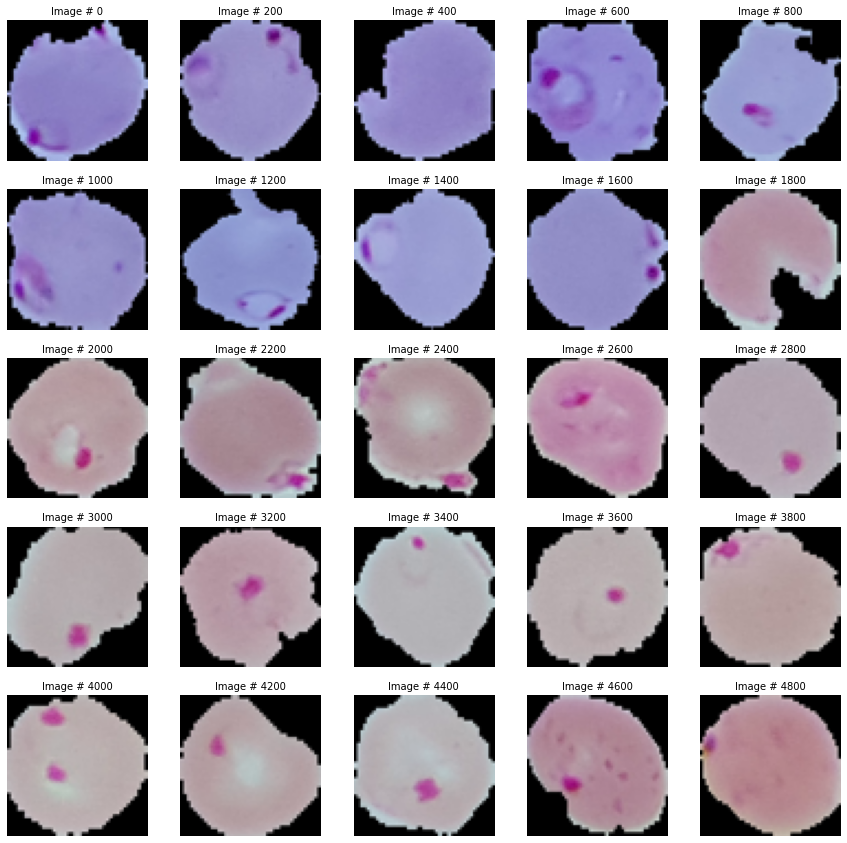

In [ ]:
#-----------------------------------------------------------------
# - Visualize 25 parasitized images
#-----------------------------------------------------------------
# set the number of skipped images
# - integer division
NUM_SKIPPED_IMAGES = num_parasitized_images // 25
# specify the overall grid size
plt.figure(figsize=(15,15)) 
plt.title("Parasitized images", fontsize=12)
# iterate over the 25 images
for i in range(25):
    # create the subplot for the next ime
    plt.subplot(5,5,i+1)   
    # image counter 
    image_counter = np.min([i * NUM_SKIPPED_IMAGES, NUM_USED_DATASET_IMAGES - 1])
    # display the image
    plt.imshow(dataset[image_counter])
    plt.title("Image # " + str(image_counter), fontsize=10)
    plt.axis('off')

### 2.2) Read the uninfected/healthy images:
Read and format the uninfected/healthy images:
* Each PNG is read and formatted and added to the dataset list
* We visualize 25 images (every kth image)

#### 2.2.1) Iterate through all PNG images in the Uninfected sub-folder

In [ ]:
#-----------------------------------------------------------------
# - Resize each image to: INPUT_IMAGE_SIZE x INPUT_IMAGE_SIZE:
#   - INPUT_IMAGE_SIZE: is global parameter
# - Save the resized into the dataset numpy array
# - Set its label to 1: Uninfected
#-----------------------------------------------------------------
# get the images in the Uninfected sub-folder
uninfected_images = os.listdir(image_directory + 'Uninfected/')
# initialize the number of uninfected images
num_uninfected_images = 0
# itererate over the content of the sub-folder
for i, image_name in enumerate(uninfected_images):   
    # check if the file extension is: png to indicate this is an image file
    if (image_name.split('.')[1] == 'png'):
        # increment the number of used uninfected images
        num_uninfected_images = num_uninfected_images + 1;
        # check if we have selected the NUM_USED_DATASET_IMAGES images
        if (num_uninfected_images > NUM_USED_DATASET_IMAGES):
          # break
          break;
          
        # read the image
        image = cv2.imread(image_directory + 'Uninfected/' + image_name)
        # format the image to type Image
        image = Image.fromarray(image, 'RGB')
        # resiz ethe image
        image = image.resize((INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE))
        # convert it back to numpy array and append to to dataset list
        dataset.append(np.array(image))
        # append the label 1: Uninfected to labels list
        labels.append(1)

# the final number of used parasitized images 
num_uninfected_images = num_uninfected_images - 1;
# display a message
print("Read and formatted {0} uninfected input images\n\n".format(num_uninfected_images))

Read and formatted 5000 uninfected input images





#### 2.2.2) Visualize some of the Uninfected input images

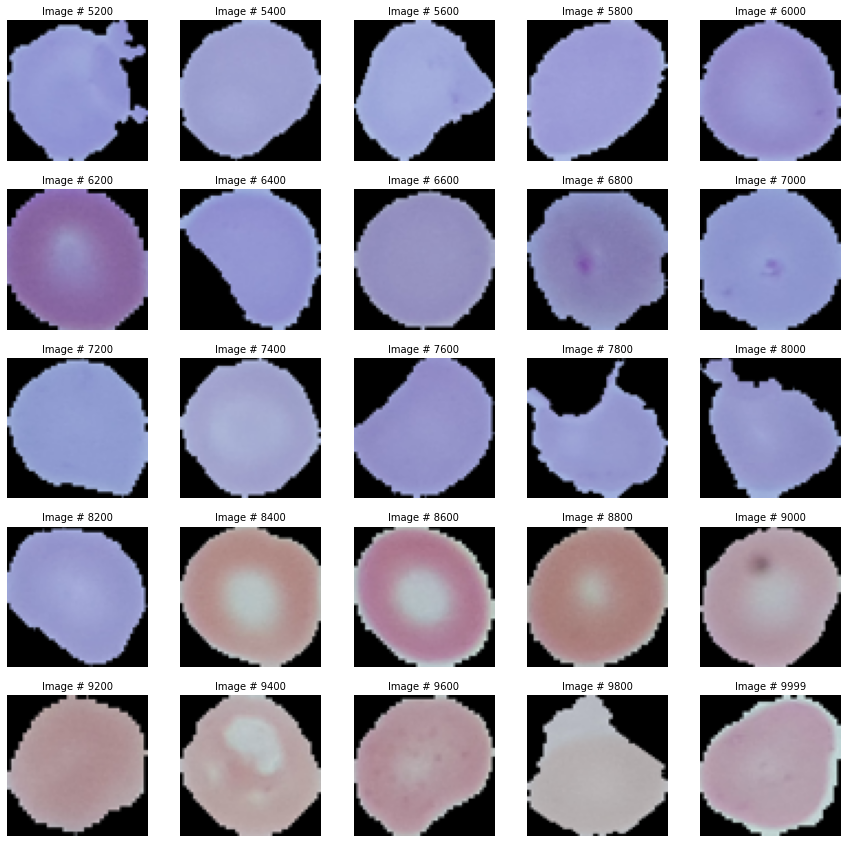

In [ ]:
#-----------------------------------------------------------------
# - Visualize 25 uninfected images
#-----------------------------------------------------------------
# set the number of skipped images
# - integer division
NUM_SKIPPED_IMAGES = num_uninfected_images // 25
# specify the overall grid size
plt.figure(figsize=(15,15)) 
plt.title("Uninfected images", fontsize=12)
# iterate over the 25 images
for i in range(25):
    # create the subplot for the next ime
    plt.subplot(5,5,i+1)   
    # image counter 
    image_counter = np.min(np.array([NUM_USED_DATASET_IMAGES + NUM_SKIPPED_IMAGES + i * NUM_SKIPPED_IMAGES, 2 * NUM_USED_DATASET_IMAGES -1 ]))
    # display the image
    plt.imshow(dataset[image_counter])
    plt.title("Image # " + str(image_counter), fontsize=10)
    plt.axis('off')

##**Step 3: Split the dataset into training and testing data subsets**
 
* Split the dataset into training and testing dataset:
  * Testing data subset proportion: TEST_DATA_SUBSET_TEST_DATA_SUBSET_PROPORTION
  * Training data subset fraction: (1-TEST_DATA_SUBSET_TEST_DATA_SUBSET_PROPORTION)



In [ ]:
#-------------------------------------------------------------------------------
# Split the dataset into:
#-------------------------------------------------------------------------------
# - Testing data subset: TEST_DATA_SUBSET_PROPORTION
# - Training data subset: (1-TEST_DATA_SUBSET_PROPORTION).
X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(labels)), 
                                                    test_size = TEST_DATA_SUBSET_PROPORTION, 
                                                    random_state = RANDOM_STATE)
# display message
print("-------------------------------------------------------------------------")
print("The dataset is split into training and testing subsets:")
print("-------------------------------------------------------------------------")
print("The number of training images = " + str(len(y_train)))
print("The number of test images = " + str(len(y_test)))
print("-------------------------------------------------------------------------")

-------------------------------------------------------------------------
The dataset is split into training and testing subsets:
-------------------------------------------------------------------------
The number of training images = 8000
The number of tst images = 2000
-------------------------------------------------------------------------


##**Step 4: Build the CNN  model**
 
* Build the CNN model:
    * A sequence of convolutional and pooling layers.
    * With some some normalization and dropout layers in between.
* Expriment with different structures and hyper parameters

#### 4.1) Define the model layers:


In [ ]:
#-------------------------------------------------------------------------------
# Define sequential layers of the CNN model:
#-------------------------------------------------------------------------------
# 1) Input layer with image size: INPUT_IMAGE_SIZE x INPUT_IMAGE_SIZE
#-------------------------------------------------------------------------------
# the input layer size
INPUT_SHAPE = (INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE, 3)   
# create the input layer
inp = keras.layers.Input(shape=INPUT_SHAPE)

#-------------------------------------------------------------------------------
# 2) Convolutional layer # 1: with 32 filters
#-------------------------------------------------------------------------------
conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3), 
                            activation='relu', padding='same')(inp)
# max-pooling layer
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
# batch-normalization layer
norm1 = keras.layers.BatchNormalization(axis = -1)(pool1)
# dropout layer
drop1 = keras.layers.Dropout(rate=0.2)(norm1)

#-------------------------------------------------------------------------------
# 3) Convolutional layer # 2: with 32 filters
#------------------------------------------------------------------------------
conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation='relu', padding='same')(drop1)
# max-pooling layer
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
# batch-normalization layer
norm2 = keras.layers.BatchNormalization(axis = -1)(pool2)
# dropout layer
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

# Flatten the matrix to get it ready for dense layers
flat = keras.layers.Flatten()(drop2)  

#-------------------------------------------------------------------------------
# 4) Dense layer # 1: with 512 neurons
#-------------------------------------------------------------------------------
# dense layer of size 512 neurons
hidden1 = keras.layers.Dense(512, activation='relu')(flat)
# batch-normalization layer
norm3 = keras.layers.BatchNormalization(axis = -1)(hidden1)
# dropout layer
drop3 = keras.layers.Dropout(rate=0.2)(norm3)

#-------------------------------------------------------------------------------
# 5) Dense layer # 2: with 256 neurons
#-------------------------------------------------------------------------------
hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
# batch-normalization layer
norm4 = keras.layers.BatchNormalization(axis = -1)(hidden2)
# dropout layer
drop4 = keras.layers.Dropout(rate=0.2)(norm4)
#-------------------------------------------------------------------------------
# 6) Output layer: with 2 outputs
#-------------------------------------------------------------------------------
# final output layer with 2 outputs (0 vs. 1)
out = keras.layers.Dense(2, activation='sigmoid')(drop4)  

####4.2) Construct the Keras model using the above defined layers

In [ ]:
#-------------------------------------------------------------------------------
# Define the Keras model using the above defined layers:
#-------------------------------------------------------------------------------
#  - Experiment with using:
#      - binary_crossentropy: suitable for binary classification 
#      - categorical_crossentropy: suitable for multi-class classification 
model = keras.Model(inputs=inp, outputs=out)

####4.3) Compile the CNN model

In [ ]:
#-------------------------------------------------------------------------------
# Compile the model
#-------------------------------------------------------------------------------
model.compile(optimizer='adam',
                loss='categorical_crossentropy',   
                metrics=['accuracy'])

####4.4) Print the model summary

In [ ]:
#-------------------------------------------------------------------------------
# Printout the model summary
#-------------------------------------------------------------------------------
# print model summary
print(model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_12 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0   

##**Step 5: Fit/train the model**

* Train the model on the training data set


In [ ]:
# train the model
history = model.fit(np.array(X_train),            # training data images
                         y_train,                 # training data labels
                         batch_size = 64,         # experiment with the batch-size
                         verbose = 2,             # logging-flag: set 0, 1, 2, 3, etc.
                         epochs = 100,            # experiment with the number of epochs
                         validation_split = 0.10,  # fraction of the validation data subset taken from the training subset
                         shuffle = False          # set to False
                         # callbacks=callbacks    # we did not implement any callbacks function
                     )

Epoch 1/100
113/113 - 37s - loss: 0.6653 - accuracy: 0.7049 - val_loss: 4.0594 - val_accuracy: 0.6025
Epoch 2/100
113/113 - 35s - loss: 0.4408 - accuracy: 0.8042 - val_loss: 0.7894 - val_accuracy: 0.7513
Epoch 3/100
113/113 - 35s - loss: 0.3525 - accuracy: 0.8475 - val_loss: 1.0265 - val_accuracy: 0.6575
Epoch 4/100
113/113 - 35s - loss: 0.2286 - accuracy: 0.9112 - val_loss: 2.9734 - val_accuracy: 0.5562
Epoch 5/100
113/113 - 35s - loss: 0.1610 - accuracy: 0.9388 - val_loss: 2.0291 - val_accuracy: 0.6150
Epoch 6/100
113/113 - 35s - loss: 0.1275 - accuracy: 0.9529 - val_loss: 1.0389 - val_accuracy: 0.7688
Epoch 7/100
113/113 - 35s - loss: 0.1189 - accuracy: 0.9549 - val_loss: 0.3282 - val_accuracy: 0.8988
Epoch 8/100
113/113 - 35s - loss: 0.0973 - accuracy: 0.9625 - val_loss: 0.3123 - val_accuracy: 0.9112
Epoch 9/100
113/113 - 35s - loss: 0.0797 - accuracy: 0.9726 - val_loss: 0.2569 - val_accuracy: 0.9275
Epoch 10/100
113/113 - 35s - loss: 0.0712 - accuracy: 0.9729 - val_loss: 0.2197 - 

##**Step 6: Evaluate the model**

* Evaluate the performance of the trained model on the test data subset

#### 6.1) Model training performance metrics: Loss function
Display the variations of:

* The loss function
* The classification accuracy 

for the different epochs for:

  * The training data subset
  * The validation data subset

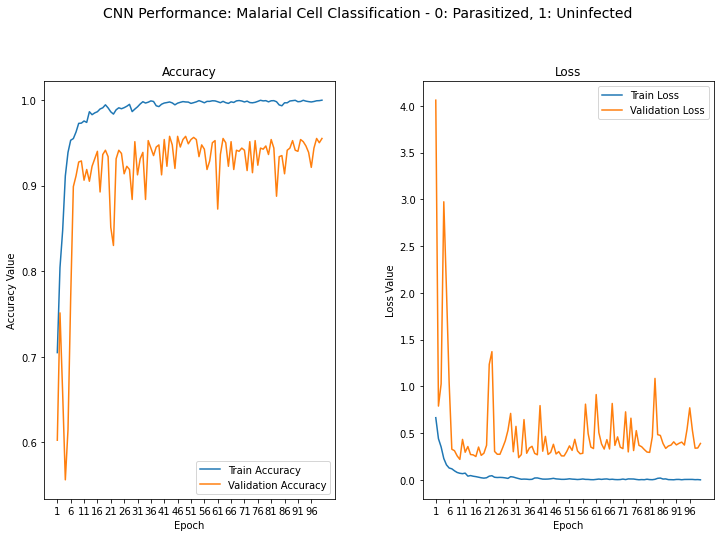

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
t = f.suptitle('CNN Performance: Malarial Cell Classification - 0: Parasitized, 1: Uninfected', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


#### 6.2) Overall Accuracy on test data subset:
Compute the overall accuracy on the test data subset

In [ ]:
# ## Accuracy calculation on the test data subset
test_data_accuracy = model.evaluate(np.array(X_test), np.array(y_test))[1]*100
# display a message
print("-------------------------------------------------------------------------")
print("Trained model performance evaluation on test data subset:")
print("-------------------------------------------------------------------------")
print("Test_Accuracy: {:.2f}%".format(test_data_accuracy))
print("-------------------------------------------------------------------------")

63/63 [==============================] - 3s 42ms/step - loss: 0.3806 - accuracy: 0.9565
-------------------------------------------------------------------------
Trained model performance evaluation on test data subset:
-------------------------------------------------------------------------
Test_Accuracy: 95.65%
-------------------------------------------------------------------------


##**Step 7: Save the trained CNN model**
* Save the trained model fro future re-use.

In [ ]:
# Save the trained model
model.save('trained-malaria-cells-classification-cnn-model-01Apr2021.h5')

##**Step 8: End of Execution**
* Display a successful end of execution message

In [ ]:
# display a final message
# current time
now = datetime.datetime.now()
# display a message
print('Program executed successfully on: '+ str(now.strftime("%Y-%m-%d %H:%M:%S") + "...Goodbye!\n"))

Program executed successfully on: 2021-04-02 01:43:43...Goodbye!

